In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x, i, k, n
import mpmath

# Setup Vars
fig = plt.figure(figsize=(18, 12))

# Custom Functions
def calculate(X, y):
  f = lambdify(x, y, 'numpy')
  f = np.vectorize(f)
  return f(X)

def calcIter(X, f):
  y = []
  for i in X:
    y.append(f.subs(x, i))
  return y  

def calcIterEval(X, f):
  y = []
  for i in X:
    y.append(f.subs(x, i).evalf())
  return y  

def calcIterEval2Deg(X, f):
  y = []
  for i in X:
    y.append(f.subs(x,  mpmath.radians(i)).evalf())
  return y 

# Calculate yprime from
# https://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy
def yprime(y):
  return y.diff(x)

def getX0(X, y):
  for index, i in enumerate(X):
    if i == 0:
      return [i, y[index]]
  return None

def Slope0(X, y, yprime):
  y0 = abs(y[0])
  x0 = X[0]
  slope0 = abs(yprime[0])
  for index, slope in enumerate(yprime):
    if abs(slope) < slope0:
      slope0 = abs(slope)
      x0, y0 = X[index], y[index]
  return x0, y0

def outf(f, y):
  print('{:<40} :'.format(str(f)), y)
    

# X values
X1 = np.arange(0, 361, 1)

# Math Functions
# Sin
# Declare
f_1a = sin(x)
# Calculate
y_1a = calcIterEval2Deg(X1, f_1a)
y_1aprime = calcIterEval2Deg(X1, f_1a.diff(x))


# >>> import mpmath
# >>> f.subs(x, mpmath.radians(25))
# y_1a = calculate(X1, f_1a)
# y_1aprime = calculate(X1, yprime(f_1a))


# y_3d = []
# for i in X3:
#   y_3d.append(f_3d.subs(n, i).evalf())




# >>> f = cos(x)
# >>> f.subs(x, 25)
# cos(25)
# >>> N(f.subs(x, 25)) # evaluate after substitution 
# 0.991202811863474

# # factorial
# # Declare
# f_2d = factorial(x)
# # Calculate
# y_2d = []
# for i in X2:
#   y_2d.append(factorial(i))

# Results
print("X values:")
print(X)
print("y values:")
outf(f_1a, y_1a)
outf(yprime(f_1a), y_1aprime)



X values:
[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6]
y values:
sin(x)                                   : [0, 0.0174524064372835, 0.0348994967025010, 0.0523359562429438, 0.0697564737441253, 0.0871557427476582, 0.104528463267653, 0.121869343405147, 0.139173100960065, 0.156434465040231, 0.173648177666930, 0.190808995376545, 0.207911690817759, 0.224951054343865, 0.241921895599668, 0.258819045102521, 0.275637355816999, 0.292371704722737, 0.309016994374947, 0.325568154457157, 0.342020143325669, 0.358367949545300, 0.374606593415912, 0.390731128489274, 0.406736643075800, 0.422618261740699, 0.438371146789077, 0.453990499739547, 0.469471562785891, 0.484809620246337, 0.500000000000000, 0.515038074910054, 0.529919264233205, 0.544639035015027, 0.559192903470747, 0.573576436351046, 0.587785252292473, 0.601815023152048, 0.615661475325658, 0.629320391049837, 0.642787609686539, 0.656059028990507, 0.669130606358858, 0.681998360062498, 0.694658370458997, 0.707106781186547, 0.719339800338651, 0.73135370161

<Figure size 1296x864 with 0 Axes>

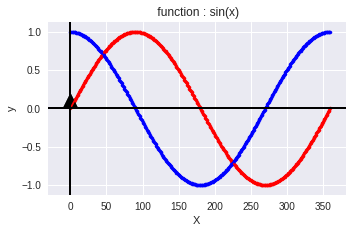

In [67]:
# https://colab.research.google.com/notebooks/charts.ipynb
fig = plt.figure(figsize=(18, 12))

def funcPlot(plt, X, y, p0, clr, fName):
  plt.scatter(X, y, color=clr, s = 10)
  plt.plot(X, y, color=clr)
  plt.scatter(p0[0], p0[1], color='black', marker='^', s = 200)
  plt.title(" function : " + str(fName))
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")

# Visualising 
# 1°
plt.subplot2grid((4, 12), (0, 0), rowspan = 1, colspan = 3)
funcPlot(plt, X1, y_1a, getX0(X, y_1a), 'red', f_1a)
funcPlot(plt, X1, y_1aprime, getX0(X, y_1a), 'blue', f_1a)


plt.tight_layout()
plt.show()